(258, 258)
1 1
5 2
10 3
50 4
100 5


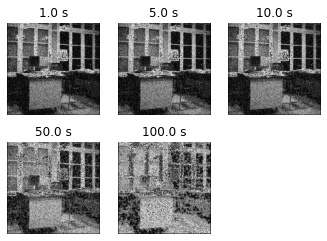

In [1]:
import numpy as np
import sys
import imageio
from matplotlib import pyplot as plt
import scipy.sparse
import scipy.sparse.linalg
import cv2

np.set_printoptions(threshold=sys.maxsize)
Image = cv2.imread('./Images/office_noisy.png') 
Image =cv2.cvtColor(Image,cv2.COLOR_RGB2GRAY)

#Resizing image to reduce the dimension of coeffiecient array while solving the pde
#resized_img = cv2.resize(Image,(90,90), interpolation = cv2.INTER_AREA)
padded_digit = cv2.copyMakeBorder(Image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
print(padded_digit.shape)
Lx, Ly = padded_digit.shape


alpha = 1
delta_x = 1

#delta_t = (delta_x ** 2)/(4 * alpha)
delta_t = 0.01
gamma = (alpha * delta_t) / (delta_x ** 2)

u = padded_digit.copy()
# Initial condition
u0 = padded_digit.copy()


# Set the boundary conditions
u[(Lx-1):, :] = 0
u[:, :1] = 0
u[:1, 1:] = 0
u[:, (Ly-1):] = 0

def calculate(u0,u):
    
    u[1:-1, 1:-1] = gamma * (u0[2:, 1:-1] + u0[:-2, 1:-1] + u0[1:-1, 2:] + u0[1:-1, :-2] - 4*u0[1:-1, 1:-1]) + u0[1:-1, 1:-1]
            
    u0 = u.copy()

    return u0,u

# Do the calculation here

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [1,5, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = calculate(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(230 + fignum)
        im = ax.imshow(u.copy(), cmap='gray', vmin=0, vmax=255)
        ax.set_axis_off()
        ax.set_title('{:.1f} s'.format(m))
fig.subplots_adjust(right=0.85)
plt.show()
